In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import gensim

In [2]:
# Reading data
#data = pd.read_csv("quora_duplicate_questions.tsv", sep="\t")

# cleaning of the data
#from ipynb.fs.full.Data_preprocessing import clean

#data['question1'] = data['question1'].apply(clean)
#data['question2'] = data['question2'].apply(clean)

In [3]:
# Reading clean data
data = pd.read_csv('CleanData.csv')

In [4]:
# Splitting the dataset
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 21)

In [5]:
'''
word2vec is a method that use a vector to represent a word,
because calculate word in the network directly is difficult.
It use one-hot encoding to represent the word in the form of 
number vector.


'''
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
model.init_sims(replace=True)


In [6]:
'''
Function wmd returns distance between two questions
ie s1 and s2 using word2vec model
'''
def wmd(s1,s2):
    return model.wmdistance(s1, s2)

In [7]:
'''
distance function is used to calculate distance
between pair of questions present in the dataset.
'''
def distance(data):
    s1 = list(data['question1'].astype(str))
    s2 = list(data['question2'].astype(str))
    dist = []
    num = len(s1)
    for i in range(num):      
        sent1 = [word for word in s1[i].split() if word in model.vocab]
        sent2 = [word for word in s2[i].split() if word in model.vocab]
        
        if len(sent1)>0 and len(sent2)>0:
            dist.append(model.wmdistance(sent1,sent2))
        else:
            dist.append(2)
        
       
        if i%10000==0:
            print(i)
            print(sent1)
            print(sent2)
            print(model.wmdistance(sent1,sent2))
       
    return dist
    
print('Training question distance\n')
train_dist = distance(train_data)
print('\nTest question distance\n')
test_dist = distance(test_data)

Training question distance

0
['what', 'is', 'the', 'average', 'electric', 'bill', 'for', 'apartment', 'in', 'the', 'bay', 'area']
['how', 'common', 'is', 'it', 'in', 'the', 'bay', 'area', 'for', 'families', 'with', 'kids', 'or', 'single', 'parents', 'live', 'in', 'one', 'bedroom', 'apartments']
0.7507286417284865
10000
['what', 'will', 'you', 'do', 'if', 'you', 'feel', 'regret', 'for', 'sending', 'messages', 'girl']
['what', 'will', 'first', 'come', 'in', 'your', 'mind', 'if', 'you', 'came', 'know', 'that', 'your', 'room', 'had', 'hidden', 'camera', 'for', 'over', 'last', 'few', 'months']
0.8783433180907949
20000
['how', 'do', 'i', 'define', 'my', 'comfort', 'zone']
['how', 'can', 'we', 'know', 'that', 'we', 'are', 'now', 'in', 'our', 'comfort', 'zone']
0.8370728004987814
30000
['what', 'are', 'some', 'your', 'culture', 'taboos']
['what', 'are', 'some', 'cultural', 'taboos', 'in', 'china']
0.49835693016288085
40000
['in', 'terms', 'general', 'relativity', 'how', 'does', 'the', 'moon',

120000
['what', 'was', 'moses', 'adoptive', 'relationship', 'with', 'was', 'he', 'brother', 'cousin', 'or', 'nephew']
['did', 'moses', 'go', 'heaven', 'in', 'the', 'bible', 'if', 'not', 'why', 'did', 'not', 'he', 'go', 'heaven']
1.023320136343118


In [8]:
# Storing distances in a text file
'''
f = open('train_data_distance.txt', 'r+')
f.truncate(0)

with open('train_data_distance.txt', 'w') as f1:
    for item in train_dist:
        f1.write("%s\n" % item)
        
with open('test_data_distance.txt', 'w') as f2:
    for item in test_dist:
        f2.write("%s\n" % item)
'''     


'\nf = open(\'train_data_distance.txt\', \'r+\')\nf.truncate(0)\n\nwith open(\'train_data_distance.txt\', \'w\') as f1:\n    for item in train_dist:\n        f1.write("%s\n" % item)\n        \nwith open(\'test_data_distance.txt\', \'w\') as f2:\n    for item in test_dist:\n        f2.write("%s\n" % item)\n'

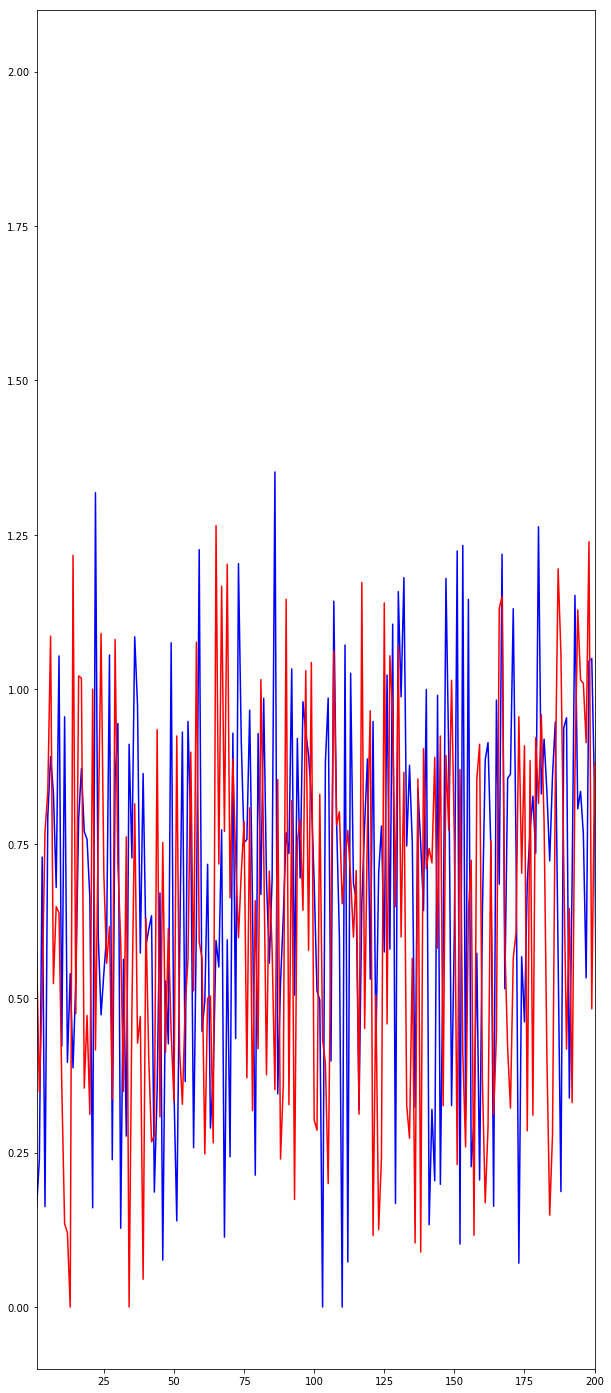

In [9]:
# Visualising distance vs index of training dataset
plt.figure(figsize=(10,25))
plt.plot(train_dist, color='blue', label='training dataset')
plt.plot(test_dist, color='red', label='test dataset')
plt.xlim(1, 200)

plt.show()

In [10]:
'''
To calculate accuracy, we considered a threshold value for which if similarity > threshold,
quesstions are similar, otherwise not. Now using the original data['isduplicate'], we check for:

True_pos  = A true positive is an outcome where the model correctly predicts the positive class
True_neg  = A true negative is an outcome where the model correctly predicts the negative class.
False_pos = A false positive is an outcome where the model incorrectly predicts the positive class. 
False_neg = A false negative is an outcome where the model incorrectly predicts the negative class.

accuracy is calculated as (total umber of correct predictions)/(total number of predictions done)

accuracy is calculated for different threshold values for both test and training data sets.

'''
def accuracy(similarity, data, threshold):
    
    
    similar = list( [0 if i>threshold else 1 for i in similarity] )
    X = list(data['is_duplicate'])
    false_pos =0
    false_neg=0
    true_pos=0
    true_neg=0

    for i in range(0, len(X)):
        if(X[i]== similar[i]):
            if X[i]==1:
                true_pos =1+true_pos
            else:
                true_neg = 1+true_neg
        else:
            if X[i]==1:
                false_neg =1+false_neg
            else:
                false_pos  = 1+false_pos
        
    acc = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
    acc*=100
    return acc, false_neg, true_neg, false_pos, true_pos 

Train Data

threshold      accuracy    false-Negative   True-Negative     false-Positive    True-Positive

0.000000        62.826189       102675          175864          2528            1936           
0.078947        62.471069       101875          174059          4333            2736           
0.157895        61.968248       96300           167061          11331           8311           
0.236842        62.699335       88303           161133          17259           16308          
0.315789        63.599679       79620           154998          23394           24991          
0.394737        64.450200       69221           147006          31386           35390          
0.473684        65.507786       57360           138138          40254           47251          
0.552632        66.403536       44477           127790          50602           60134          
0.631579        66.679859       32045           116140          62252           72566          
0.710526        65.811316    

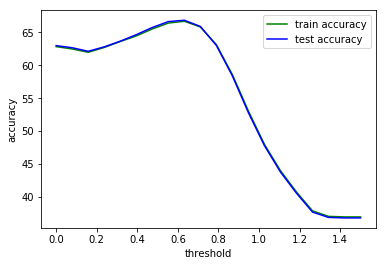

In [11]:
# Plotting accuracy of the model against different thresholds.
x = np.linspace(0, 1.5, 20)

print('Train Data\n')
print("threshold      accuracy    false-Negative   True-Negative     false-Positive    True-Positive\n")
accuracy_train = []
for i in x:
    acc, false_neg, true_neg, false_pos, true_pos = accuracy(train_dist, train_data, i)
    accuracy_train.append(acc)
    print("{:<15f} {:<15f} {:<15d} {:<15d} {:<15d} {:<15d}".format(i, acc, false_neg, true_neg, false_pos, true_pos))
    
    

print('\nTest Data\n')
print("threshold      accuracy    false-Negative   True-Negative     false-Positive    True-Positive\n")

accuracy_test = []
for i in x:
    acc, false_neg, true_neg, false_pos, true_pos = accuracy(test_dist, test_data, i)
    accuracy_test.append(acc)
    print("{:<15f} {:<15f} {:<15d} {:<15d} {:<15d} {:<15d}".format(i, acc, false_neg, true_neg, false_pos, true_pos))
    
    
    

plt.plot(x,accuracy_train, color='green', label='train accuracy')
plt.plot(x,accuracy_test, color='blue', label='test accuracy')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
Y = train_data['is_duplicate']
y_train = np.array(Y)
y_train.reshape(-1,1)
train_distance = np.array(train_dist).reshape(-1,1)

In [29]:
logreg = LogisticRegression()
logreg.fit(train_distance, y_train)

/home/stud/btech/cse/2017/rahul.cs17/anaconda3/envs/rahul/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
Y_pred = logreg.predict(np.array(test_dist).reshape(-1,1))

In [31]:
Y_pred.size

121287

In [32]:
acc_log = round(logreg.score(train_distance, y_train) * 100, 2)

In [33]:
acc_log

64.68

In [42]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(train_distance, y_train)
Y_pred = random_forest.predict(np.array(test_dist).reshape(-1,1))
acc_random_forest = round(random_forest.score(train_distance, y_train) * 100, 2)
acc_random_forest

94.0

In [43]:
y_test = np.array(test_data['is_duplicate']).reshape(-1,1)

In [44]:
acc_random_forest = round(random_forest.score(np.array(test_dist).reshape(-1,1), y_test) * 100, 2)
acc_random_forest

63.63

In [45]:
linear_svc = LinearSVC()
linear_svc.fit(train_distance, y_train)
Y_pred = linear_svc.predict(np.array(test_dist).reshape(-1,1))
acc_linear_svc = round(linear_svc.score(train_distance, y_train) * 100, 2)
acc_linear_svc

64.63

In [46]:
acc_linear_svc = round(linear_svc.score(np.array(test_dist).reshape(-1,1), y_test) * 100, 2)
acc_linear_svc

64.83

In [47]:
sgd = SGDClassifier()
sgd.fit(train_distance, y_train)
Y_pred = sgd.predict(np.array(test_dist).reshape(-1,1))
acc_sgd = round(sgd.score(train_distance, y_train) * 100, 2)
acc_sgd

/home/stud/btech/cse/2017/rahul.cs17/anaconda3/envs/rahul/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


65.12

In [48]:
acc_sgd = round(sgd.score(np.array(test_dist).reshape(-1,1), y_test) * 100, 2)
acc_sgd

65.29

In [49]:
gaussian = GaussianNB()
gaussian.fit(train_distance, y_train)
Y_pred = gaussian.predict(np.array(test_dist).reshape(-1,1))
acc_gaussian = round(gaussian.score(train_distance, y_train) * 100, 2)
acc_gaussian

66.08

In [50]:
acc_gaussian = round(gaussian.score(np.array(test_dist).reshape(-1,1), y_test) * 100, 2)
acc_gaussian

66.25

In [51]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_distance, y_train)
acc_knn = round(knn.score(train_distance, y_train) * 100, 2)
acc_knn

80.91

In [52]:
acc_knn = round(knn.score(np.array(test_dist).reshape(-1,1), y_test) * 100, 2)
acc_knn

64.55

In [ ]:
'''
import pickle
f = open('Google_word2vec.pickle', 'wb')
pickle.dump(model, f)
f.close()
'''